In [2]:
import pandas as pd
File  = pd.read_csv("Master dataframe.csv")
Ag_dec_Sociodemo = pd.DataFrame(File)
Ag_dec_Sociodemo.drop(columns = "Unnamed: 0", axis = 1, inplace = True)
Ag_dec_Sociodemo.columns

Index(['Respondent's Name', 'Municipality', 'Ward', 'Sex', 'Age',
       'Number of Family members', 'Educational Qualification',
       'Primary Occupation', 'Caste', 'Productivity per unit of land',
       'Possibility to plant across years', 'Aesthetically good-looking',
       'Vulnerability to pests', 'Vulnerability to damage by wildlife',
       'Suitable to local biodiversity and pollinators',
       'More amount of fertilizers and pesticide necessary',
       'More amount of water necessary',
       'Adverse impact to soil health and productivity',
       'Less amount of time and energy necessary',
       'Overall climate suitability', 'Initial costliness',
       'Economic or market viability/demand',
       'Less perishable and higher storage life', 'Crop Choice'],
      dtype='object')

In [3]:
Ag_dec_Sociodemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 24 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Respondent's Name                                   117 non-null    object 
 1   Municipality                                        117 non-null    object 
 2   Ward                                                115 non-null    float64
 3   Sex                                                 116 non-null    object 
 4   Age                                                 114 non-null    float64
 5   Number of Family members                            114 non-null    float64
 6   Educational Qualification                           116 non-null    object 
 7   Primary Occupation                                  115 non-null    object 
 8   Caste                                               116 non-null    object 
 9  

### Preparing our entire feature set for analysis 

For our purpose, we shall only observe how the factors such as Age, Sex, Location, and Educational Qualification representing sociodemographic profile of the repsondents affect crop choices (Now, we do not yet have sufficient literary evidence to justify why we have only decided to choose Age, Sex, Location, and Education Qualification as our socio-demographic variables). Although the respondents may not be a household head, the fact that most of them are farmers (i.e., conveyed Agriculture as their primary occupation) provides a sufficient ground for them to qualify as individuals of the household that at least take significant agricultural decisions constituting nature of crop to be planted in their farmland  

In [4]:
Selected_data = Ag_dec_Sociodemo[["Sex", "Age", "Number of Family members", "Educational Qualification", "Crop Choice"]]
Selected_data.columns

Index(['Sex', 'Age', 'Number of Family members', 'Educational Qualification',
       'Crop Choice'],
      dtype='object')

In [5]:
#Now lets introduce are another variable that we assume to be predictor of crop choices. Since, we do not have this feature in our master dataframe,
#we will have to borrow it from the original nexus xls file. 
File = pd.read_csv("Nexus_strip.csv")
Nexus = pd.DataFrame(File)
Farm_forest = Nexus["16.  Is your farm plots close to the local forest or rangeland?"]
Farm_forest = pd.DataFrame(Farm_forest)
Farm_forest.rename(columns = {"16.  Is your farm plots close to the local forest or rangeland?": "Proximity of farm to forest"}, inplace = True)
Farm_forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Proximity of farm to forest  118 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [6]:
#So, lets combine our probable predicting variables into a single dataframe before further preprocessing
Ag_dec_SD = pd.concat([Selected_data, Farm_forest], axis = 1)
Ag_dec_SD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sex                          116 non-null    object 
 1   Age                          114 non-null    float64
 2   Number of Family members     114 non-null    float64
 3   Educational Qualification    116 non-null    object 
 4   Crop Choice                  117 non-null    object 
 5   Proximity of farm to forest  118 non-null    object 
dtypes: float64(2), object(4)
memory usage: 5.7+ KB


In [7]:
#Need to again get rid of the null value in the target variable that appeared after dataframe merging
Ag_dec_SD.dropna(subset = ["Crop Choice"], inplace=True)

#### Exploratory Data Analysis

In [8]:
Ag_dec_SD["Proximity of farm to forest"].value_counts()
#conveys that most of our respondents own farmlands close to forest

Proximity of farm to forest
Yes    92
No     25
Name: count, dtype: int64

In [9]:
#Lets check how crop choice differ among respondents who have farms close to forest and not
pivot_ftf = Ag_dec_SD.pivot_table(index = "Proximity of farm to forest",
                                  columns = "Crop Choice",
                                  aggfunc="size",
                                  fill_value=0)
pivot_ftf
#Not much insight could be gained due to skewness of data of one against another

Crop Choice,Planting of hybrid species of crops only,Planting of indigenous species of crops only,Planting of mix of hybrid and indigenous species of crops
Proximity of farm to forest,,,
No,1,16,8
Yes,8,35,49


### Preprocessing (OneHotEncoding, Standardizing, LabelEncoding)

In [10]:
#Now breaking our dataframe into independent and target datasets as we begin our preprocessing task
Ag_dec_SD_ind = Ag_dec_SD.drop(columns = "Crop Choice", axis=1)
Ag_dec_SD_ind.columns

Index(['Sex', 'Age', 'Number of Family members', 'Educational Qualification',
       'Proximity of farm to forest'],
      dtype='object')

In [11]:
x_value = Ag_dec_SD_ind
y_value = Ag_dec_SD["Crop Choice"]
#Before we preprocessed our data, it is essential to split them into training, evaluation, and testing batch to avoid data snooping
from sklearn.model_selection import train_test_split
x_train_eval, x_test, y_train_eval, y_test = train_test_split(x_value, y_value, test_size = 0.3, random_state = 0, stratify = y_value)
x_train, x_eval, y_train, y_eval = train_test_split(x_train_eval, y_train_eval, test_size = 0.3, random_state = 0, stratify = y_train_eval)
print(x_train.shape[0], x_eval.shape[0], x_test.shape[0], y_train.shape[0], y_eval.shape[0], y_test.shape[0])  

56 25 36 56 25 36


Preprocessing of independent variables

In [12]:
y_value.value_counts()

Crop Choice
Planting of mix of hybrid and indigenous species of crops    57
Planting of indigenous species of crops only                 51
Planting of hybrid species of crops only                      9
Name: count, dtype: int64

In [13]:
#Now for each batch of both independent and dependent datasets we need to seperate the continuous and categorical variables. But before that 
#lets turn them in dataframe for such abilities

x_train_df = pd.DataFrame(x_train)
y_train_df = pd.DataFrame(y_train)
x_eval_df = pd.DataFrame(x_eval)
y_eval_df = pd.DataFrame(y_eval)
x_test_df = pd.DataFrame(x_test)
y_test_df =pd.DataFrame(y_test)

In [14]:
#So, now we drop all null values that are present in the independent variables for each batch seperately
train_set = pd.concat([x_train_df, y_train_df], axis = 1)
train_set.dropna(inplace = True)
x_train_df = train_set.drop(columns = "Crop Choice")
y_train_df = train_set["Crop Choice"]

eval_set = pd.concat([x_eval_df, y_eval_df], axis = 1)
eval_set.dropna(inplace = True)
x_eval_df = eval_set.drop(columns = "Crop Choice")
y_eval_df = eval_set["Crop Choice"]

test_set = pd.concat([x_test_df, y_test_df], axis = 1)
test_set.dropna(inplace = True)
x_test_df = test_set.drop(columns = "Crop Choice")
y_test_df = test_set["Crop Choice"]

print(x_train_df.shape[0], x_eval_df.shape[0], x_test_df.shape[0], y_train_df.shape[0], y_eval_df.shape[0], y_test_df.shape[0])

53 24 35 53 24 35


In [15]:
#Seperating numeric variables from categorical variables for independent batches
x_train_df_numeric = x_train_df.select_dtypes(include = ["float64", "int64"])
x_train_df_categorical = x_train_df.select_dtypes(include = "object")

x_eval_df_numeric = x_eval_df.select_dtypes(include = ["float64", "int64"])
x_eval_df_categorical = x_eval_df.select_dtypes(include = "object")

x_test_df_numeric = x_test_df.select_dtypes(include = ["float64", "int64"])
x_test_df_categorical = x_test_df.select_dtypes(include = ["object"])

In [16]:
#Now preprocessing the numeric nature of independent batches by standardizing them into z-scores
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(x_train_df_numeric)
x_train_numeric_std = Scaler.transform(x_train_df_numeric)
x_train_numeric_std_df = pd.DataFrame(x_train_numeric_std)

x_eval_numeric_std = Scaler.transform(x_eval_df_numeric)
x_eval_numeric_std_df = pd.DataFrame(x_eval_numeric_std)

x_test_numeric_std = Scaler.transform(x_test_df_numeric)
x_test_numeric_std_df = pd.DataFrame(x_test_numeric_std)

x_train_numeric_std_df.head()
#Looks like they have gone well

,0,1
0,-0.208638,0.497946
1,-1.538904,1.015420
2,-1.705187,0.497946
3,-0.208638,-1.054474
4,-0.042355,-0.537001


In [17]:
x_train_numeric_std_df.columns = x_train_df_numeric.columns
x_eval_numeric_std_df.columns = x_train_df_numeric.columns
x_test_numeric_std_df.columns = x_train_df_numeric.columns
x_test_numeric_std_df.head()
#so far so good

,Age,Number of Family members
0,-1.538904,-1.054474
1,2.285609,-1.054474
2,-0.873771,-0.537001
3,-0.458063,-0.019527
4,0.955344,2.567840


In [18]:
#Now preprocessing the categorical nature of the independent batches through onehotencoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, drop = "first", handle_unknown= "ignore")
encoder.fit(x_train_df_categorical)
encoded_x_train = encoder.transform(x_train_df_categorical)
x_train_encoded_df = pd.DataFrame(encoded_x_train, columns = encoder.get_feature_names_out(x_train_df_categorical.columns.to_list()))

encoded_x_eval = encoder.transform(x_eval_df_categorical)
x_eval_encoded_df = pd.DataFrame(encoded_x_eval, columns = encoder.get_feature_names_out(x_train_df_categorical.columns.to_list()))

encoded_x_test = encoder.transform(x_test_df_categorical)
x_test_encoded_df = pd.DataFrame(encoded_x_test, columns = encoder.get_feature_names_out(x_train_df_categorical.columns.to_list()))
x_test_encoded_df.head()
#The encoding is a success

d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Sex_Male,Educational Qualification_Undergraduate,Educational Qualification_Unofficial Education,Proximity of farm to forest_Yes
0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,1.0
4,1.0,0.0,1.0,0.0


In [19]:
#Ok now its time to merge the preprocessed independent datasets 
x_train_df = pd.concat([x_train_numeric_std_df, x_train_encoded_df], axis=1)
x_eval_df = pd.concat([x_eval_numeric_std_df, x_eval_encoded_df], axis=1)
x_test_df = pd.concat([x_test_numeric_std_df, x_test_encoded_df], axis=1)
x_test_df.head()
#The concatenation of the encoded dataframe of Independent variables is a success!

,Age,Number of Family members,Sex_Male,Educational Qualification_Undergraduate,Educational Qualification_Unofficial Education,Proximity of farm to forest_Yes
0,-1.538904,-1.054474,0.0,0.0,0.0,0.0
1,2.285609,-1.054474,0.0,0.0,1.0,1.0
2,-0.873771,-0.537001,0.0,0.0,1.0,1.0
3,-0.458063,-0.019527,1.0,0.0,1.0,1.0
4,0.955344,2.567840,1.0,0.0,1.0,0.0


Preprocessing of Dependent Variables

In [20]:
#Now label encoding the batches of target variables. 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train_df)
y_train_encoded = label_encoder.transform(y_train_df)
y_train_encoded_df = pd.DataFrame(y_train_encoded)

y_eval_encoded = label_encoder.transform(y_eval_df)
y_eval_encoded_df = pd.DataFrame(y_eval_encoded)

y_test_encoded = label_encoder.transform(y_test_df)
y_test_encoded_df = pd.DataFrame(y_test_encoded)

for i, labels in enumerate(label_encoder.classes_):
    print(i, labels)

0 Planting of hybrid species of crops only
1 Planting of indigenous species of crops only
2 Planting of mix of hybrid and indigenous species of crops


In [21]:
#Now adding names into the column
column_names = ["Crop Choice"]
y_train_encoded_df.columns = column_names
y_eval_encoded_df.columns = column_names
y_test_encoded_df.columns = column_names

print(y_train_encoded_df.value_counts())
print(y_eval_encoded_df.value_counts())
print(y_test_encoded_df.value_counts())
#Observe the distribution the minor label class "o" across the batches

Crop Choice
2              27
1              23
0               3
Name: count, dtype: int64
Crop Choice
2              12
1              10
0               2
Name: count, dtype: int64
Crop Choice
2              17
1              16
0               2
Name: count, dtype: int64


### Processing the data (Ensemble Tree-based Models)

#### Random Forests

In [22]:
#We shall again deploy RandomForest Classifer to train and build our classification model based on training data set, evaluate our model based on 
#evaluation data, and test our model based on testing data  

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

Trees = np.arange(10, 160, 10)
maxfeatures = int(np.sqrt(x_train_df.shape[1]))
Estimated = []
for values in Trees:
    rf = RandomForestClassifier(n_estimators = values,
                                max_features = maxfeatures,
                                max_depth = None,
                                random_state = 0)
    rf.fit(x_train_df, y_train_encoded_df)
    y_eval_encoded_df_proba_hat = rf.predict_proba(x_eval_df)
    scores = log_loss(y_eval_encoded_df, y_eval_encoded_df_proba_hat)
    Estimated.append(scores)
print(f"{maxfeatures} features are allowed per random tree in our models")
print(Estimated)

d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

2 features are allowed per random tree in our models
[5.180640948135611, 3.855138313883868, 3.8793119768077418, 3.9015849405683682, 2.5863592251893017, 2.587502798507781, 2.5938506818325355, 2.5690272333905075, 1.2569541623121598, 1.255637741611589, 1.2317271060975543, 1.2409544949034228, 1.2575683393339128, 1.269103207484149, 1.2781163672517015]


In [23]:
#Just juxtaposing the R2scores with the respective number of estimators
for i, scores in enumerate(Estimated):
    print((i+1)*10, scores)
#The models with 10 and 130 number of estimators are able to generate the highest scores 

10 5.180640948135611
20 3.855138313883868
30 3.8793119768077418
40 3.9015849405683682
50 2.5863592251893017
60 2.587502798507781
70 2.5938506818325355
80 2.5690272333905075
90 1.2569541623121598
100 1.255637741611589
110 1.2317271060975543
120 1.2409544949034228
130 1.2575683393339128
140 1.269103207484149
150 1.2781163672517015


In [31]:
Estimated_ag_socio = pd.DataFrame(Estimated)
Estimated_ag_socio.to_csv("Estimations_ag_socio.csv")

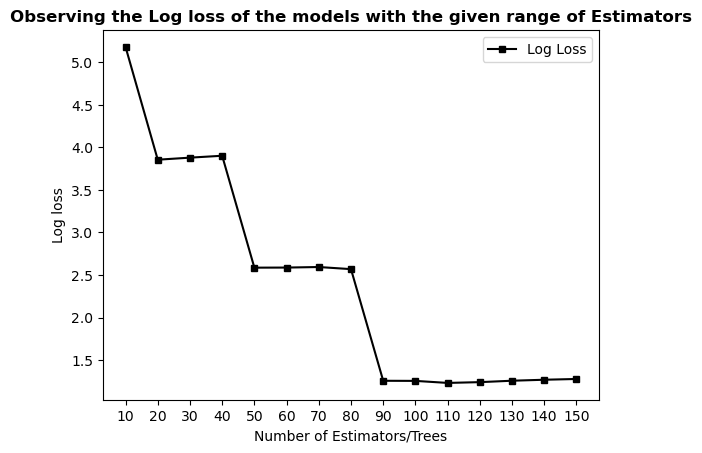

In [24]:
#Visual representation of score pattern
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(Trees,
        Estimated,
        marker = "s",
        markersize = 5,
        color = "black",
        label = "Log Loss")

ax.set_title("Observing the Log loss of the models with the given range of Estimators",
          fontweight = "bold")
ax.set_xlabel("Number of Estimators/Trees")
ax.set_xticks(np.arange(10, 160, 10))
ax.set_ylabel("Log loss")
plt.legend()
plt.show()

In [25]:
#Testing the predictability of the model on test batch with the highest number of estimators that was also able to produce the highest R2 score
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 110,
                            max_features = maxfeatures,
                            max_depth = None,
                            random_state = 0)
rf.fit(x_train_df, y_train_encoded_df)
y_test_encoded_df_proba_hat = rf.predict_proba(x_test_df)
print(log_loss(y_test_encoded_df, y_test_encoded_df_proba_hat))

1.9258886849757744


d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


#### Observation

Our model obtains the Log loss of 1.9259, which is embarassingly higher than the baseline Log loss of 0.8722 assinged to the testing batch of the dataset given its unique classification characterstics. It is alike to noting that our model performs worse than a model that virtually learned nothing. 

Log loss > Baseline Log loss

LL baseline =−∑(M, j=1) Pj log(Pj)

LL baseline =−(P1 ln(P1) + P2 ln(P2) + P3 ln(P3))

LL baseline= −(0.05714 × ln(0.05714) + 0.45714 × ln(0.45714) + 0.48571 × ln(0.48571))

LL baseline =− ((0.05714 × −2.861) + (0.45714 × −0.783) + (0.48571 × −0.722))

LL baseline =−(−0.1634 + −0.3580 + −0.3508)

LL baseline =−(−0.8722)

LL baseline ≈ 0.8722

In [26]:
y_test_encoded_df_hat = rf.predict(x_test_df)
y_test_encoded_df_hat[0:9]

array([2, 2, 1, 2, 2, 2, 2, 2, 2])

In [33]:
#Lets retrieve the features that were most important in determining the model 
Feature_Importance = rf.feature_importances_
Feature_Importance = pd.DataFrame(Feature_Importance)
Feature_Importance = Feature_Importance.T
Feature_Importance.columns = x_train_df.columns.to_list()
Feature_Importance = Feature_Importance.T
Feature_Importance.reset_index(inplace = True)

Feature_Importance.columns = ["Features", "Significance"]
Feature_Importance.sort_values(by = "Significance", ascending= False, inplace = True)
Feature_Importance = Feature_Importance.head()
Feature_Importance

,Features,Significance
0,Age,0.431259
1,Number of Family members,0.326890
2,Sex_Male,0.096834
5,Proximity of farm to forest_Yes,0.066868
4,Educational Qualification_Unofficial Education,0.059191


In [29]:
#the weights of the feature sum to one as in one hundred percent
Feature_Importance["Significance"].sum()

np.float64(0.9810416738263674)

In [34]:
Feature_Importance.to_csv("Feature_imp_socio_demo.csv")

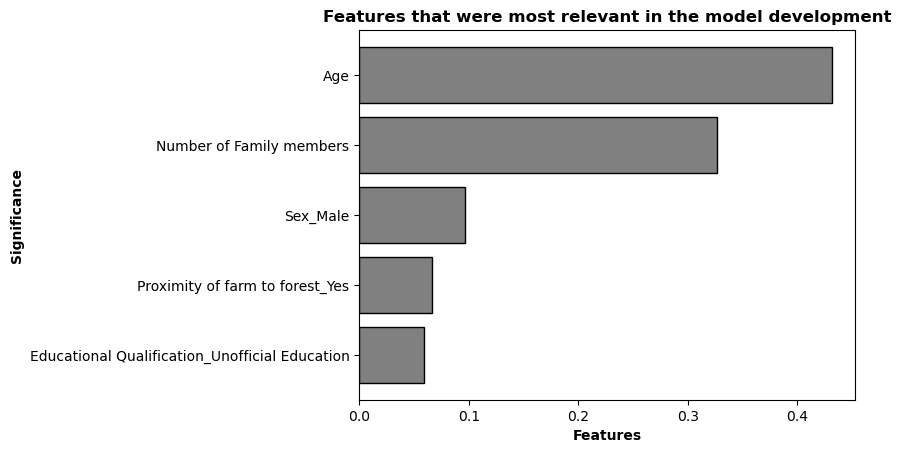

In [ ]:
#Lets plot our Feature Significance table to see what feature and category played the top signficant role in determining our not-so-accurate
# predicting model
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.barh(Feature_Importance["Features"], 
        Feature_Importance["Significance"],
        color = "grey",
        edgecolor = "black")
ax.set_title("Features that were most relevant in the model development",
             fontweight = "black")
ax.set_xlabel("Features",
              fontweight = "black")
ax.set_ylabel("Significance",
              fontweight = "black")
ax.invert_yaxis()

plt.show()
 

In [158]:
#So lets prepare the classification report now, to check our precise, recall, and f1score
y_test_unencoded_df_hat = label_encoder.inverse_transform(y_test_encoded_df_hat) #lets reverse transform our data for labelling purpose
y_test_unencoded_df_hat = pd.DataFrame(y_test_unencoded_df_hat) 
y_test_unencoded_df_hat.head()

,0
0,Planting of mix of hybrid and indigenous speci...
1,Planting of mix of hybrid and indigenous speci...
2,Planting of indigenous species of crops only
3,Planting of mix of hybrid and indigenous speci...
4,Planting of mix of hybrid and indigenous speci...


In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df, y_test_unencoded_df_hat))

                                                           precision    recall  f1-score   support

                 Planting of hybrid species of crops only       0.00      0.00      0.00         2
             Planting of indigenous species of crops only       0.50      0.44      0.47        16
Planting of mix of hybrid and indigenous species of crops       0.52      0.65      0.58        17

                                                 accuracy                           0.51        35
                                                macro avg       0.34      0.36      0.35        35
                                             weighted avg       0.48      0.51      0.49        35



d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [160]:
y_test_df = pd.DataFrame(y_test_df)
y_test_df.set_index("Crop Choice", inplace = True)
y_test_df.reset_index(inplace = True)

In [164]:
#This is in case if we want to create a table of probability scores and how it performed against the actual classifications. And also check the 
# probability scores that were confidently wrong and sufferred heavy penalty in the log_loss test 

probability_score = pd.DataFrame(y_test_encoded_df_proba_hat)
probability_score.columns = [label_encoder.classes_]
probability_score = pd.concat([probability_score, y_test_df], axis = 1)
probability_score.head()
probability_score.to_csv("log_loss example.csv")

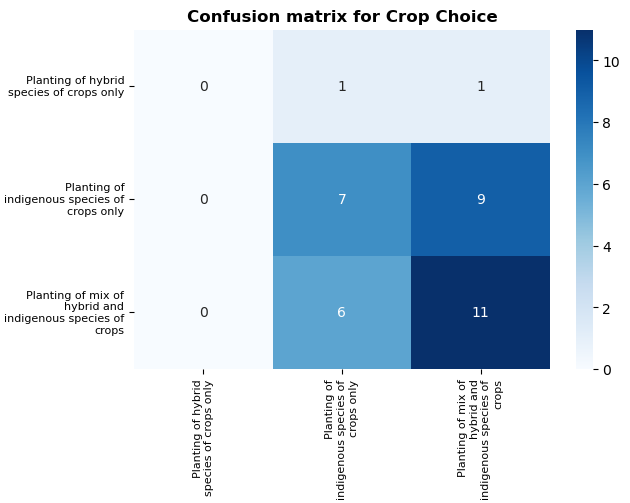

In [162]:
#Now observing the accuracy of the classifiction through heuretics method called confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrx = confusion_matrix(y_test_df, y_test_unencoded_df_hat)

fig, ax= plt.subplots()
sns.heatmap(conf_matrx, 
            annot = True,
            cmap = "Blues",
            xticklabels = label_encoder.classes_,
            yticklabels = label_encoder.classes_,
            ax=ax)

ax.set_title("Confusion matrix for Crop Choice",
          fontsize = 12,
          fontweight = "bold")
ax.set_xlabel("Predicted crop choice",
              fontweight = "bold")
ax.set_ylabel("Actual crop choice",
              fontweight = "bold")

xticklabels = ax.get_xticklabels()
for labels in xticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("right")
    labels.set_va("center")

yticklabels = ax.get_yticklabels()
for labels in yticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("right")
    labels.set_va("center")
    
plt.tight_layout()
plt.show()

#### Extreme Gradient Boosting (Optional)

In [152]:
#Since the classifications were not impressively precise, we shall attempt the analysis with the same set of data through boosting method. 
# XGBOOST shall be applied for such purpose
import numpy as np
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score

param_grid = {"estimators": np.arange(10, 160, 10), 
              "learning rate": np.arange(0.1, 1.1, 0.1)}

best_score = 0
best_param = {}
scores = []

for trees in param_grid["estimators"]:
    for learners in param_grid["learning rate"]:
        current_params = {"n_estimators": trees, 
                          "learning_rate": learners}
        xgb = XGBClassifier(current_params, random_state = 0)
        xgb.fit(x_train_df, y_train_encoded_df)
        score = xgb.score(x_eval_df, y_eval_encoded_df)
        scores.append(score)

        if score > best_score: #it keeps on iterating from zero until the highest value is found
            best_score = score
            best_param = current_params
print(best_param)
print(f"the best_score we could achieve could explain only explain {round(best_score*100, 3)} percent of the variance, which as good as random guess")
print(scores) #the scores shall be printed based every given estimator and learning rate parameter, and suprisingly they are all 0.5

d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\

{'n_estimators': np.int64(10), 'learning_rate': np.float64(0.1)}
the best_score we could achieve could explain only explain 33.333 percent of the variance, which as good as random guess
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.33333333333

Given that we were not able to gather very good accuracy with the boosting algorithm, It appears we are sticking the Random Forest Classifier for our analysis